In [1]:
library(dplyr)
print("ready")
setwd("/share/hennlab/users/glmeeks/age_methylation/FUSION")
load("../methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")
##make sure order is the same as genotype files
####Himba#########
geno_order <- read.delim("FUSION_data/geno/Himba//Himba_chr1_FUSION_data.fam", sep="", header=FALSE)
print(ncol(Himba_merged))
Himba_merged <- Himba_merged[,!colnames(Himba_merged) %in% c("HMB181_2"),]

Himba_merged <- Himba_merged[,geno_order[,1]]
Himba_pheno_merged <- Himba_pheno_merged[geno_order[,1],]
geno_order
Himba_pheno_merged <- Himba_pheno_merged[!rownames(Himba_pheno_merged) %in% c("HMB181_2"),]

###rownames(Himba_pheno_merged)[rownames(Himba_pheno_merged) == "HMB494-2"] <- "HMB494"
###names(Himba_merged)[names(Himba_merged) == "HMB494-2"] <- "HMB494"
geno_order$V1
colnames(Himba_merged)
rownames(Himba_pheno_merged)   
print(paste0("origninal #cps:", nrow(Himba_merged)))
#do  I need to omit na rows from pheno?

#Himba_merged <- na.omit(Himba_merged)
print(paste0("nrow Himba is", nrow(Himba_merged)))

hg19_snp_manifest <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EPIC.hg19.manifest.tsv", header=T, sep="\t")
Himba_fusion <- Himba_merged[rownames(Himba_merged) %in% hg19_snp_manifest$probeID,]
#ELOVL2 <- Himba_fusion[which(rownames(Himba_fusion) == "cg16867657"), ]
#test set
#Himba_fusion <- rbind(Himba_fusion[c(1:10),], ELOVL2)
print(paste0("#cps found in manifest:", print(nrow(Himba_fusion))))

manifest <- hg19_snp_manifest[hg19_snp_manifest$probeID %in% rownames(Himba_fusion),]
gene <- rownames(Himba_fusion)
Himba_fusion <- cbind(gene, Himba_fusion)
manifest <- dplyr::arrange(manifest, desc(probeID))
Himba_fusion <- dplyr::arrange(Himba_fusion, desc(gene))

end <- manifest[match(Himba_fusion$gene, manifest$probeID),"CpG_end"]
start <- manifest[match(Himba_fusion$gene, manifest$probeID), "CpG_beg"]
chr <- manifest[match(Himba_fusion$gene, manifest$probeID), "CpG_chrm"]
Himba_fusion <- cbind(chr,start, end, Himba_fusion)
Himba_fusion$chr <- gsub("chr*", " ", Himba_fusion$chr )

names(Himba_fusion)[names(Himba_fusion)=="chr"] <- 'chr'
write.table(Himba_fusion, file = "FUSION_data/FUSION_pheno/Himba/Himba_hg19_meth_pre.bed", sep = "\t",row.names = FALSE, quote=FALSE)
HMB_fusion_params2 <- cbind("Himba", Himba_fusion$chr, Himba_fusion$start, Himba_fusion$end, Himba_fusion$gene)
write.table(HMB_fusion_params2, file = "Himba_fusion_params2.tsv", sep = "\t",row.names = FALSE, quote=FALSE, col.names=FALSE)
setwd("FUSION_data/FUSION_pheno/Himba/")
# add a "#" to the bed file
command <- "sed -i '1s/^/#/' Himba_hg19_meth_pre.bed && mv Himba_hg19_meth_pre.bed Himba_hg19_meth.bed"
# Execute the command in the shell
system(command, intern = TRUE)

#need to gzip the file before running fusion
command <- "rm /share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/Himba/Himba_hg19_meth.bed.gz"
system(command, intern = TRUE)

command <- "gzip /share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/Himba/Himba_hg19_meth.bed"
# Execute the command in the shell
system(command, intern = TRUE)




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] "ready"
[1] 52


V1,V2,V3,V4,V5,V6
<chr>,<chr>,<int>,<int>,<int>,<int>
HMB494-2,HMB494-2,0,0,0,-9
HMB091,HMB091,0,0,0,-9
HMB113,HMB113,0,0,0,-9
HMB114,HMB114,0,0,0,-9
HMB120,HMB120,0,0,0,-9
HMB125,HMB125,0,0,0,-9
HMB136,HMB136,0,0,0,-9
HMB137,HMB137,0,0,0,-9
HMB101,HMB101,0,0,0,-9


[1] "HMB494-2" "HMB091"   "HMB113"   "HMB114"   "HMB120"   "HMB125"  
 [7] "HMB136"   "HMB137"   "HMB101"   "HMB102"   "HMB175"   "HMB177"  
[13] "HMB181"   "HMB182"   "HMB009"   "HMB013"   "HMB014"   "HMB015"  
[19] "HMB166"   "HMB170"   "HMB017"   "HMB023"   "HMB025"   "HMB030"  
[25] "HMB031"   "HMB032"   "HMB075"   "HMB078"   "HMB081"   "HMB062"  
[31] "HMB094"   "HMB093"   "HMB096"   "HMB157"   "HMB082"   "HMB085"  
[37] "HMB087"   "HMB088"   "HMB090"   "HMB008"   "HMB144"   "HMB039"  
[43] "HMB040"   "HMB150"   "HMB151"   "HMB051"   "HMB056"   "HMB066"  
[49] "HMB069"   "HMB071"   "HMB072"

[1] "HMB494-2" "HMB091"   "HMB113"   "HMB114"   "HMB120"   "HMB125"  
 [7] "HMB136"   "HMB137"   "HMB101"   "HMB102"   "HMB175"   "HMB177"  
[13] "HMB181"   "HMB182"   "HMB009"   "HMB013"   "HMB014"   "HMB015"  
[19] "HMB166"   "HMB170"   "HMB017"   "HMB023"   "HMB025"   "HMB030"  
[25] "HMB031"   "HMB032"   "HMB075"   "HMB078"   "HMB081"   "HMB062"  
[31] "HMB094"   "HMB093"   "HMB096"   "HMB157"   "HMB082"   "HMB085"  
[37] "HMB087"   "HMB088"   "HMB090"   "HMB008"   "HMB144"   "HMB039"  
[43] "HMB040"   "HMB150"   "HMB151"   "HMB051"   "HMB056"   "HMB066"  
[49] "HMB069"   "HMB071"   "HMB072"

[1] "HMB494-2" "HMB091"   "HMB113"   "HMB114"   "HMB120"   "HMB125"  
 [7] "HMB136"   "HMB137"   "HMB101"   "HMB102"   "HMB175"   "HMB177"  
[13] "HMB181"   "HMB182"   "HMB009"   "HMB013"   "HMB014"   "HMB015"  
[19] "HMB166"   "HMB170"   "HMB017"   "HMB023"   "HMB025"   "HMB030"  
[25] "HMB031"   "HMB032"   "HMB075"   "HMB078"   "HMB081"   "HMB062"  
[31] "HMB094"   "HMB093"   "HMB096"   "HMB157"   "HMB082"   "HMB085"  
[37] "HMB087"   "HMB088"   "HMB090"   "HMB008"   "HMB144"   "HMB039"  
[43] "HMB040"   "HMB150"   "HMB151"   "HMB051"   "HMB056"   "HMB066"  
[49] "HMB069"   "HMB071"   "HMB072"

[1] "origninal #cps:713988"
[1] "nrow Himba is713988"
[1] 713771
[1] "#cps found in manifest:713771"


character(0)

character(0)

character(0)

In [2]:
#grab covars
sex_cpPCs_Neutro_genoPCs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/EMMAX_covs/covs_Himba_sex_cpPCs_Neutro_genoPCs.txt", sep="", header=FALSE)
#sex_cpPCs_Neutro_genoPCs <- data.frame(lapply(sex_cpPCs_Neutro_genoPCs, function(x) gsub("HMB494-2", "HMB494", x)))
print(nrow(sex_cpPCs_Neutro_genoPCs))
head(sex_cpPCs_Neutro_genoPCs)
#add in age as a covar and scale? take out the 1 column
rownames(sex_cpPCs_Neutro_genoPCs) <- sex_cpPCs_Neutro_genoPCs$V1
Himba_pheno_merged <- Himba_pheno_merged[rownames(sex_cpPCs_Neutro_genoPCs),]
sex_cpPCs_Neutro_genoPCs$age <- Himba_pheno_merged[match(row.names(Himba_pheno_merged), row.names(sex_cpPCs_Neutro_genoPCs)), "age"]
#age is last column!
head(sex_cpPCs_Neutro_genoPCs)
sex_cpPCs_Neutro_genoPCs[, 3:ncol(sex_cpPCs_Neutro_genoPCs)] <- lapply(3:ncol(sex_cpPCs_Neutro_genoPCs), function(x)
    as.numeric(sex_cpPCs_Neutro_genoPCs[[x]]))
#should I scale age? I did here
to_scale <- scale(sex_cpPCs_Neutro_genoPCs[,5:30])
Himba_pheno_merged                                                                        
sex_cpPCs_Neutro_genoPCs <- cbind(sex_cpPCs_Neutro_genoPCs[,c(1,2,4)], to_scale)

write.table(sex_cpPCs_Neutro_genoPCs, file = "/share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/covar/Himba_covars.tsv", sep = "\t",row.names = FALSE, quote=FALSE, col.names=TRUE)
#coordiantes are open close from this manifest. Illumina manifest's target C is the middle coordiante 
#hg19_snp_manifest[hg19_snp_manifest$probeID == "cg00035864",]
head(sex_cpPCs_Neutro_genoPCs)

[1] 51


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HMB494-2,HMB494-2,1,2,-20715.3852,-400.6167,-2067.759,-4524.990,-2082.1308,1894.1051,...,1206.11974,165.85186,-497.00763,211.9496,0.9473410,-0.031447400,-0.03164060,0.00546915,-0.03320900,-0.0247727
2,HMB091,HMB091,1,1,-400.9257,-17275.1385,-2586.459,2195.509,486.2993,799.9233,...,-1082.04877,-986.90802,768.32745,1032.6839,0.9016222,-0.002110740,-0.01919160,0.05938290,0.08467130,-0.0450428
3,HMB113,HMB113,1,2,-1955.1034,14484.5779,-9769.866,3261.756,1796.0676,-1361.6076,...,-1103.91583,293.61320,594.26973,-282.7698,0.8809047,-0.018261200,-0.02359070,0.02683110,-0.00778883,0.0283007
4,HMB114,HMB114,1,1,9997.1221,-225.6303,4340.697,3398.531,-405.5577,-1467.7059,...,-423.75727,890.48017,99.01679,585.6354,0.6993122,-0.040276800,-0.02412200,0.02206460,-0.02596710,-0.0180710
5,HMB120,HMB120,1,1,-32298.0534,9907.6985,20220.470,-4265.495,167.9043,316.6695,...,-65.97904,214.49646,971.94691,584.1905,0.4422287,0.000907907,0.00229903,0.04031030,0.14434200,-0.2456660
6,HMB125,HMB125,1,1,12266.6519,5903.4982,5780.025,4535.664,1234.9541,-1279.9541,...,-27.82015,16.09366,-919.72602,383.2312,0.7210035,0.355380000,0.00951167,-0.06906090,-0.04809120,0.1188540


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,age
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMB494-2,HMB494-2,HMB494-2,1,2,-20715.3852,-400.6167,-2067.759,-4524.990,-2082.1308,1894.1051,...,165.85186,-497.00763,211.9496,0.9473410,-0.031447400,-0.03164060,0.00546915,-0.03320900,-0.0247727,56
HMB091,HMB091,HMB091,1,1,-400.9257,-17275.1385,-2586.459,2195.509,486.2993,799.9233,...,-986.90802,768.32745,1032.6839,0.9016222,-0.002110740,-0.01919160,0.05938290,0.08467130,-0.0450428,82
HMB113,HMB113,HMB113,1,2,-1955.1034,14484.5779,-9769.866,3261.756,1796.0676,-1361.6076,...,293.61320,594.26973,-282.7698,0.8809047,-0.018261200,-0.02359070,0.02683110,-0.00778883,0.0283007,8
HMB114,HMB114,HMB114,1,1,9997.1221,-225.6303,4340.697,3398.531,-405.5577,-1467.7059,...,890.48017,99.01679,585.6354,0.6993122,-0.040276800,-0.02412200,0.02206460,-0.02596710,-0.0180710,6
HMB120,HMB120,HMB120,1,1,-32298.0534,9907.6985,20220.470,-4265.495,167.9043,316.6695,...,214.49646,971.94691,584.1905,0.4422287,0.000907907,0.00229903,0.04031030,0.14434200,-0.2456660,34
HMB125,HMB125,HMB125,1,1,12266.6519,5903.4982,5780.025,4535.664,1234.9541,-1279.9541,...,16.09366,-919.72602,383.2312,0.7210035,0.355380000,0.00951167,-0.06906090,-0.04809120,0.1188540,46


,PC1_meth,PC2_meth,PC3_meth,PC4_meth,PC5_meth,PC6_meth,PC7_meth,PC8_meth,PC9_meth,PC10_meth,...,PC11_cp,PC12_cp,PC13_cp,PC14_cp,PC15_cp,PC16_cp,PC17_cp,PC18_cp,PC19_cp,PC20_cp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMB494-2,355.64299,-317.364546,-63.823326,258.2015959,-2.950112,-100.688671,-92.4682539,-28.748536,-152.644388,121.653465,...,-443.44900,167.03667,-300.81383,-1164.28445,858.74044,1087.23746,1206.11974,165.85186,-497.00763,211.94959
HMB091,268.55586,202.891067,322.975263,8.5874311,-42.546306,376.608459,-613.0620126,-77.281950,-53.963391,-33.276052,...,499.61830,-1655.34722,625.08889,114.92121,84.04164,386.94737,-1082.04877,-986.90802,768.32745,1032.68388
HMB113,248.09284,-62.362527,186.751609,-104.6787505,45.428946,-258.851931,60.1036492,-245.833347,117.303317,-195.769773,...,393.74060,-945.26340,-466.60186,54.08546,710.04449,-587.06579,-1103.91583,293.61320,594.26973,-282.76982
HMB114,-196.53171,243.923483,35.204045,-2.4668390,201.569141,-101.415615,128.2996602,-87.864074,-44.567632,32.555138,...,-502.10747,1542.21281,-799.18308,-402.84606,-1657.32861,1451.13377,-423.75727,890.48017,99.01679,585.63540
HMB120,-884.66688,-437.792820,53.358200,375.1796575,228.906624,463.753983,248.3553871,-299.844493,-4.198091,-237.039751,...,-1242.96615,-1200.36275,297.73802,461.12378,280.52080,668.14543,-65.97904,214.49646,971.94691,584.19053
HMB125,-142.18493,216.537309,-7.752563,-60.8400915,25.759040,79.415798,133.7208482,25.418291,-24.088134,36.875128,...,113.92194,248.46766,-500.80971,-106.70684,-129.03534,211.89990,-27.82015,16.09366,-919.72602,383.23119
HMB136,76.15946,99.642774,-49.027768,-73.1699866,162.132303,83.841161,-9.2153356,92.041346,39.593634,82.186024,...,1263.66752,314.96729,-298.08279,-157.59734,218.58939,-49.80061,159.72525,-224.70707,-197.35662,199.38074
HMB137,-387.95122,-609.093033,-271.177067,-251.4757577,128.880000,71.739817,-103.1919298,162.402313,80.679742,65.857363,...,426.20783,1129.89073,-389.73055,1153.97323,1500.37655,-857.66529,116.69605,-73.71634,-217.36820,712.88704
HMB101,-382.43273,62.703518,37.688318,115.9266603,179.110099,13.168030,2.6275049,83.185232,31.255654,61.120853,...,428.47398,-251.10688,-1051.78614,780.19992,-812.39005,802.73714,-436.92888,690.23447,-1524.65461,-874.89683


,V1,V2,V4,V5,V6,V7,V8,V9,V10,V11,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,age
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMB494-2,HMB494-2,HMB494-2,2,-1.2508929,-0.013519279,-0.4036453,-0.9807392,-1.1562882,1.2980936,0.06483659,...,0.19850702,-0.7326281,0.3241585,1.1040191,-0.222366865,-0.22373282,0.03867276,-0.23482292,-0.1751695,0.5004010
HMB091,HMB091,HMB091,1,-0.0159450,-1.865153227,-0.4965846,0.4882360,0.2842127,0.5585902,0.29895766,...,-1.54687147,1.1439024,1.5762039,0.7642374,-0.014925467,-0.13570507,0.41990043,0.59871632,-0.3185007,1.5569803
HMB113,HMB113,HMB113,2,-0.1104259,1.619826661,-1.7836879,0.7212976,1.0187946,-0.9022818,0.44986326,...,0.39194877,0.8857695,-0.4305451,0.6102657,-0.129126402,-0.16681141,0.18972451,-0.05507525,0.2001160,-1.4502068
HMB114,HMB114,HMB114,1,0.6161687,0.005681906,0.7446045,0.7511939,-0.2159843,-0.9739884,0.36931411,...,1.29565716,0.1512943,0.8942232,-0.7393261,-0.284800117,-0.17056827,0.15602028,-0.18361497,-0.1277813,-1.5314821
HMB120,HMB120,HMB120,1,-1.9550215,1.117607677,3.5898992,-0.9240185,0.1056412,0.2319828,-1.51739985,...,0.27215916,1.4458763,0.8920190,-2.6499651,0.006419579,0.01625667,0.28503682,1.02065170,-1.7371203,-0.3936276
HMB125,HMB125,HMB125,1,0.7541369,0.678228517,1.0024993,0.9997500,0.7040948,-0.8470962,0.53107234,...,-0.02823989,-1.3595324,0.5854518,-0.5781168,2.512914412,0.06725775,-0.48833412,-0.34005592,0.8404243,0.0940244


In [1]:
library(dplyr)
setwd("/share/hennlab/users/glmeeks/age_methylation/FUSION/")
load("../methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")
##make sure order is the same as genotype files
#####KHS#########
geno_order <- read.delim("FUSION_data/geno/KHS/KHS_chr1_FUSION_data.fam", sep="", header=FALSE)
print(ncol(KHS_merged))

KHS_merged <- KHS_merged[,geno_order[,1]]
KHS_pheno_merged <- KHS_pheno_merged[geno_order[,1],]
geno_order

geno_order$V1
colnames(KHS_merged)
rownames(KHS_pheno_merged)   
print(paste0("original # cpgs:", nrow(KHS_merged)))
#do  I need to omit na rows from pheno?
#KHS_merged <- na.omit(KHS_merged)
print(paste0("nrow KHS is", nrow(KHS_merged)))


hg19_snp_manifest <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/HM450.hg19.manifest.tsv", header=T, sep="\t")
KHS_fusion <- KHS_merged[rownames(KHS_merged) %in% hg19_snp_manifest$probeID,]

print(paste0("#cpgs found in manifest:",nrow(KHS_fusion)))

manifest <- hg19_snp_manifest[hg19_snp_manifest$probeID %in% rownames(KHS_fusion),]
gene <- rownames(KHS_fusion)
KHS_fusion <- cbind(gene, KHS_fusion)
manifest <- dplyr::arrange(manifest, desc(probeID))
KHS_fusion <- dplyr::arrange(KHS_fusion, desc(gene))

end <- manifest[match(KHS_fusion$gene, manifest$probeID),"CpG_end"]
start <- manifest[match(KHS_fusion$gene, manifest$probeID), "CpG_beg"]
chr <- manifest[match(KHS_fusion$gene, manifest$probeID), "CpG_chrm"]
KHS_fusion <- cbind(chr,start, end, KHS_fusion)
KHS_fusion$chr <- gsub("chr*", " ", KHS_fusion$chr )

names(KHS_fusion)[names(KHS_fusion)=="chr"] <- 'chr'
write.table(KHS_fusion, file = "FUSION_data/FUSION_pheno/KHS/KHS_hg19_meth_pre.bed", sep = "\t",row.names = FALSE, quote=FALSE)
KHS_fusion_params2 <- cbind("KHS", KHS_fusion$chr, KHS_fusion$start, KHS_fusion$end, KHS_fusion$gene)
write.table(KHS_fusion_params2, file = "KHS_fusion_params2.tsv", sep = "\t",row.names = FALSE, quote=FALSE, col.names=FALSE)
setwd("FUSION_data/FUSION_pheno/KHS/")
# add a "#" to the bed file
command <- "sed -i '1s/^/#/' KHS_hg19_meth_pre.bed && mv KHS_hg19_meth_pre.bed KHS_hg19_meth.bed"
# Execute the command in the shell
system(command, intern = TRUE)

#need to gzip the file before running fusion
command <- "rm /share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/KHS/KHS_hg19_meth.bed.gz"
system(command, intern = TRUE)

command <- "gzip /share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/KHS/KHS_hg19_meth.bed"
# Execute the command in the shell
system(command, intern = TRUE)




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 52


V1,V2,V3,V4,V5,V6
<chr>,<chr>,<int>,<int>,<int>,<int>
SA003,SA003,0,0,0,-9
SA028,SA028,0,0,0,-9
SA029,SA029,0,0,0,-9
SA030,SA030,0,0,0,-9
SA032,SA032,0,0,0,-9
SA037,SA037,0,0,0,-9
SA039,SA039,0,0,0,-9
SA040,SA040,0,0,0,-9
SA045,SA045,0,0,0,-9


[1] "SA003"  "SA028"  "SA029"  "SA030"  "SA032"  "SA037"  "SA039"  "SA040" 
 [9] "SA045"  "SA048"  "SA050"  "SA061"  "SA049"  "SA010"  "SA0852" "SA022" 
[17] "SA1027" "SA020"  "SA1015" "SA0742" "SA0722" "SA0642" "SA1010" "SA1009"
[25] "SA057"  "SA1000" "SA0802" "SA1006" "SA1001" "SA1029" "SA0862" "SA046" 
[33] "SA0632" "SA1023" "SA1039" "SA0682" "SA017"  "SA043"  "SA1028" "SA1041"
[41] "SA1011" "SA1025" "SA1030" "SA0952" "SA0692" "SA1022" "SA009"  "SA019" 
[49] "SA036"  "SA053"  "SA004"  "SA018"

[1] "SA003"  "SA028"  "SA029"  "SA030"  "SA032"  "SA037"  "SA039"  "SA040" 
 [9] "SA045"  "SA048"  "SA050"  "SA061"  "SA049"  "SA010"  "SA0852" "SA022" 
[17] "SA1027" "SA020"  "SA1015" "SA0742" "SA0722" "SA0642" "SA1010" "SA1009"
[25] "SA057"  "SA1000" "SA0802" "SA1006" "SA1001" "SA1029" "SA0862" "SA046" 
[33] "SA0632" "SA1023" "SA1039" "SA0682" "SA017"  "SA043"  "SA1028" "SA1041"
[41] "SA1011" "SA1025" "SA1030" "SA0952" "SA0692" "SA1022" "SA009"  "SA019" 
[49] "SA036"  "SA053"  "SA004"  "SA018"

[1] "SA003"  "SA028"  "SA029"  "SA030"  "SA032"  "SA037"  "SA039"  "SA040" 
 [9] "SA045"  "SA048"  "SA050"  "SA061"  "SA049"  "SA010"  "SA0852" "SA022" 
[17] "SA1027" "SA020"  "SA1015" "SA0742" "SA0722" "SA0642" "SA1010" "SA1009"
[25] "SA057"  "SA1000" "SA0802" "SA1006" "SA1001" "SA1029" "SA0862" "SA046" 
[33] "SA0632" "SA1023" "SA1039" "SA0682" "SA017"  "SA043"  "SA1028" "SA1041"
[41] "SA1011" "SA1025" "SA1030" "SA0952" "SA0692" "SA1022" "SA009"  "SA019" 
[49] "SA036"  "SA053"  "SA004"  "SA018"

[1] "original # cpgs:418629"
[1] "nrow KHS is418629"
[1] "#cpgs found in manifest:418629"


character(0)

character(0)

character(0)

In [2]:
##grab best covars
sex_batch_methPC13_Neutro_genoPCs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/EMMAX_covs/covs_KHS_sex_batch_PC13_meth_Neutro_genoPCs.txt", sep="", header=FALSE)
print(nrow(sex_batch_methPC13_Neutro_genoPCs))
#add in age as a covar and scale? take out the 1 column
rownames(sex_batch_methPC13_Neutro_genoPCs) <- sex_batch_methPC13_Neutro_genoPCs$V1
KHS_pheno_merged <- KHS_pheno_merged[rownames(sex_batch_methPC13_Neutro_genoPCs),]
#age is last column!!
sex_batch_methPC13_Neutro_genoPCs$age <- KHS_pheno_merged[match(row.names(KHS_pheno_merged), row.names(sex_batch_methPC13_Neutro_genoPCs)), "age"]
head(sex_batch_methPC13_Neutro_genoPCs)
sex_batch_methPC13_Neutro_genoPCs[, 3:ncol(sex_batch_methPC13_Neutro_genoPCs)] <- lapply(3:ncol(sex_batch_methPC13_Neutro_genoPCs), function(x)
     as.numeric(sex_batch_methPC13_Neutro_genoPCs[[x]]))
to_scale <- scale(sex_batch_methPC13_Neutro_genoPCs[,6:14])
                                                                       
sex_batch_methPC13_Neutro_genoPCs<- cbind(sex_batch_methPC13_Neutro_genoPCs[,c(1,2,4,5)], to_scale)
head(sex_batch_methPC13_Neutro_genoPCs)
write.table(sex_batch_methPC13_Neutro_genoPCs, file = "/share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/covar/KHS_covars.tsv", sep = "\t",row.names = FALSE, quote=FALSE, col.names=TRUE)


[1] 52


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,age
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
SA003,SA003,SA003,1,2,1,-42.568342,129.7075,0.5722899,0.0641940,-0.01229880,0.05089000,0.0224573,-0.00204488,22
SA028,SA028,SA028,1,2,1,26.100364,166.2673,0.6719165,0.0844067,-0.03642200,0.03246300,0.0190174,-0.02654870,66
SA029,SA029,SA029,1,2,1,220.972003,154.9473,0.8876491,0.0185506,-0.05378630,0.01136140,0.0628541,-0.03648730,60
SA030,SA030,SA030,1,2,1,222.706795,144.8893,0.9024743,-0.0104855,0.02352660,-0.04333750,0.0503017,0.01388570,57
SA032,SA032,SA032,1,2,1,-7.467241,-345.0277,0.7959239,-0.0850366,0.00310681,-0.00441634,0.1064100,0.01912010,50
SA037,SA037,SA037,1,2,1,-198.100025,160.5287,0.4861131,0.0635799,-0.05124530,0.04788920,0.0110731,-0.03871310,54


,V1,V2,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,age
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA003,SA003,SA003,2,1,-0.12959328,0.8617879,-0.6384095,0.45843693,-0.08783117,0.36342725,0.16037728,-0.01460345,-2.1370041
SA028,SA028,SA028,2,1,0.07945886,1.1046946,-0.2185932,0.60278449,-0.26010524,0.23183215,0.13581146,-0.18959571,0.3374217
SA029,SA029,SA029,2,1,0.67271792,1.0294833,0.6904817,0.13247786,-0.38411112,0.08113659,0.44886831,-0.26057150,0.0000000
SA030,SA030,SA030,2,1,0.67799925,0.9626572,0.7529538,-0.07488138,0.16801330,-0.30949168,0.35922619,0.09916363,-0.1687109
SA032,SA032,SA032,2,1,-0.02273296,-2.2923940,0.3039613,-0.60728273,0.02218686,-0.03153901,0.75991985,0.13654472,-0.5623695
SA037,SA037,SA037,2,1,-0.60308743,1.0665670,-1.0015498,0.45405138,-0.36596476,0.34199725,0.07907778,-0.27646689,-0.3374217


In [5]:
setwd("/share/hennlab/users/glmeeks/age_methylation/FUSION/")
load("../methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")
##make sure order is the same as genotype files
####Himba#########
geno_order <- read.delim("FUSION_data/geno/Baka/Baka_chr1_FUSION_data.fam", sep="", header=FALSE)
print(ncol(Baka))

Baka <- Baka[,geno_order[,1]]
Baka_pheno <- Baka_pheno[geno_order[,1],]
geno_order

geno_order$V1
colnames(Baka)
rownames(Baka_pheno)   
print(paste0("original # cpgs", nrow(Baka)))
#do  I need to omit na rows from pheno?
#Baka <- na.omit(Baka)
print(paste0("nrow Baka is:", nrow(Baka)))

hg19_snp_manifest <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/HM450.hg19.manifest.tsv", header=T, sep="\t")
Baka_fusion <- Baka[rownames(Baka) %in% hg19_snp_manifest$probeID,]

print(paste0("#cpgs in manifest", nrow(Baka_fusion)))

manifest <- hg19_snp_manifest[hg19_snp_manifest$probeID %in% rownames(Baka_fusion),]
gene <- rownames(Baka_fusion)
Baka_fusion <- cbind(gene, Baka_fusion)
manifest <- dplyr::arrange(manifest, desc(probeID))
Baka_fusion <- dplyr::arrange(Baka_fusion, desc(gene))

end <- manifest[match(Baka_fusion$gene, manifest$probeID),"CpG_end"]
start <- manifest[match(Baka_fusion$gene, manifest$probeID), "CpG_beg"]
chr <- manifest[match(Baka_fusion$gene, manifest$probeID), "CpG_chrm"]
Baka_fusion <- cbind(chr,start, end, Baka_fusion)
Baka_fusion$chr <- gsub("chr*", " ", Baka_fusion$chr )

names(Baka_fusion)[names(Baka_fusion)=="chr"] <- 'chr'
write.table(Baka_fusion, file = "FUSION_data/FUSION_pheno/Baka/Baka_hg19_meth_pre.bed", sep = "\t",row.names = FALSE, quote=FALSE)
Baka_fusion_params2 <- cbind("Baka", Baka_fusion$chr, Baka_fusion$start, Baka_fusion$end, Baka_fusion$gene)
write.table(Baka_fusion_params2, file = "Baka_fusion_params2.tsv", sep = "\t",row.names = FALSE, quote=FALSE, col.names=FALSE)
setwd("FUSION_data/FUSION_pheno/Baka/")
# add a "#" to the bed file
command <- "sed -i '1s/^/#/' Baka_hg19_meth_pre.bed && mv Baka_hg19_meth_pre.bed Baka_hg19_meth.bed"
# Execute the command in the shell
system(command, intern = TRUE)

#need to gzip the file before running fusion
command <- "rm /share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/Baka/Baka_hg19_meth.bed.gz"
system(command, intern = TRUE)

command <- "gzip /share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/Baka/Baka_hg19_meth.bed"
# Execute the command in the shell
system(command, intern = TRUE)


[1] 35


V1,V2,V3,V4,V5,V6
<chr>,<chr>,<int>,<int>,<int>,<int>
B20H,B20H,0,0,0,9
B20F,B20F,0,0,0,9
B22H,B22H,0,0,0,9
B22F,B22F,0,0,0,9
B01E,B01E,0,0,0,9
B04E,B04E,0,0,0,9
B19H,B19H,0,0,0,9
B19F,B19F,0,0,0,9
B03E,B03E,0,0,0,9


[1] "B20H" "B20F" "B22H" "B22F" "B01E" "B04E" "B19H" "B19F" "B03E" "B05E"
[11] "B03H" "B03F" "B08E" "B13H" "B13F" "B16E" "B20E" "B17E" "B19E" "B12H"
[21] "B12F" "B16H" "B14H" "B14F" "B23H" "B23F" "B06E" "B22E" "B13E" "B09E"
[31] "B12E" "B05H" "B05F" "B09H" "B09F"

[1] "B20H" "B20F" "B22H" "B22F" "B01E" "B04E" "B19H" "B19F" "B03E" "B05E"
[11] "B03H" "B03F" "B08E" "B13H" "B13F" "B16E" "B20E" "B17E" "B19E" "B12H"
[21] "B12F" "B16H" "B14H" "B14F" "B23H" "B23F" "B06E" "B22E" "B13E" "B09E"
[31] "B12E" "B05H" "B05F" "B09H" "B09F"

[1] "B20H" "B20F" "B22H" "B22F" "B01E" "B04E" "B19H" "B19F" "B03E" "B05E"
[11] "B03H" "B03F" "B08E" "B13H" "B13F" "B16E" "B20E" "B17E" "B19E" "B12H"
[21] "B12F" "B16H" "B14H" "B14F" "B23H" "B23F" "B06E" "B22E" "B13E" "B09E"
[31] "B12E" "B05H" "B05F" "B09H" "B09F"

[1] "original # cpgs400893"
[1] "nrow Baka is:400893"
[1] "#cpgs in manifest400893"


character(0)

character(0)

character(0)

In [6]:
sex_methPC23_Neutro_genoPC12345 <- read.delim("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/EMMAX/EMMAX_covs/covs_Baka_sex_PC23_meth_Neutro_genoPC12345.txt", sep="", header=FALSE)
print(nrow(sex_methPC23_Neutro_genoPC12345))
#add in age as a covar and scale? take out the 1 column
rownames(sex_methPC23_Neutro_genoPC12345) <- sex_methPC23_Neutro_genoPC12345$V1
Baka_pheno <- Baka_pheno[rownames(sex_methPC23_Neutro_genoPC12345),]
#age is last column
sex_methPC23_Neutro_genoPC12345$age <- Baka_pheno[match(row.names(Baka_pheno), row.names(sex_methPC23_Neutro_genoPC12345)), "age"]
head(sex_methPC23_Neutro_genoPC12345)
sex_methPC23_Neutro_genoPC12345[, 3:ncol(sex_methPC23_Neutro_genoPC12345)] <- lapply(3:ncol(sex_methPC23_Neutro_genoPC12345), function(x)
      as.numeric(sex_methPC23_Neutro_genoPC12345[[x]]))
to_scale <- scale(sex_methPC23_Neutro_genoPC12345[,5:13])
                                                                       
sex_methPC23_Neutro_genoPC12345<- cbind(sex_methPC23_Neutro_genoPC12345[,c(1,2,4)], to_scale)
head(sex_methPC23_Neutro_genoPC12345)
write.table(sex_methPC23_Neutro_genoPC12345, file = "/share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/covar/Baka_covars.tsv", sep = "\t",row.names = FALSE, quote=FALSE, col.names=TRUE)


[1] 35


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,age
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
B20H,B20H,B20H,1,2,356.80034,-28.80087,0.5269520,-0.0685434,0.28905200,0.01687200,-0.07380180,-0.0654445,29
B20F,B20F,B20F,1,1,83.50898,15.02520,0.9301654,-0.0231205,0.34138000,-0.00909706,-0.08098670,-0.0164547,23
B22H,B22H,B22H,1,2,97.23916,15.79644,0.9445639,-0.1148650,-0.00877282,0.12107700,0.33790600,-0.1135120,48
B22F,B22F,B22F,1,1,30.78720,-57.55793,0.8546346,-0.1104960,0.01207520,0.12227200,0.41581500,-0.0562715,32
B01E,B01E,B01E,1,1,399.48442,97.50556,0.7554922,-0.1071910,-0.06763820,-0.26379200,0.00692961,-0.0221954,43
B04E,B04E,B04E,1,1,-300.51288,107.03533,0.5845821,-0.0335012,0.03879540,-0.00460100,0.00582263,0.0396992,18


,V1,V2,V4,V5,V6,V7,V8,V9,V10,V11,V12,age
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B20H,B20H,B20H,2,1.7211606,-0.2006146,-2.0698797,-0.3996733,1.68544781,0.09837989,-0.43033499,-0.38160338,0.06300879
B20F,B20F,B20F,1,0.4028370,0.1046592,0.9488404,-0.1348146,1.99056980,-0.05304453,-0.47222981,-0.09594624,-0.31504394
B22H,B22H,B22H,2,0.4690697,0.1100313,1.0566372,-0.6697722,-0.05115401,0.70599457,1.97031406,-0.66188264,1.26017577
B22F,B22F,B22F,1,0.1485136,-0.4009241,0.3833672,-0.6442968,0.07040977,0.71296256,2.42459782,-0.32811607,0.25203515
B01E,B01E,B01E,1,1.9270633,0.6791824,-0.3588779,-0.6250255,-0.39439514,-1.53815928,0.04040611,-0.12941998,0.94513183
B04E,B04E,B04E,1,-1.4496369,0.7455627,-1.6384230,-0.1953439,0.22621393,-0.02682821,0.03395136,0.23148443,-0.63008788


In [1]:
####Merged data prep######
library(dplyr)
setwd("/share/hennlab/users/glmeeks/age_methylation/FUSION/")
load("../age_prediction/merged_meth_data.RData")
##make sure order is the same as genotype files

geno_order <- read.delim("FUSION_data/geno/all/all_chr1_FUSION_data.fam", sep="", header=FALSE)
print(ncol(merged_data))

cols_cpgs <- merged_data
merged_data <- t(cols_cpgs)
head(merged_data)

save(merged_data, file="/share/hennlab/users/glmeeks/age_methylation/age_prediction/merged_meth_data_cols_ids.RData")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 355104


,B20H,B20F,B22H,B22F,B01E,B04E,B19H,B19F,B03E,B05E,...,SA1030,SA0952,SA0692,SA1022,SA009,SA019,SA036,SA053,SA004,SA018
cg27666123,0.9547590,0.9502919,0.9437649,0.9500337,0.9502900,0.9353197,0.9492903,0.9373145,0.9285956,0.9396799,...,0.9390623,0.9459347,0.9413337,0.9266656,0.9604378,0.9453138,0.9534902,0.9527306,0.9366807,0.9378090
cg27666046,0.6610690,0.6317282,0.6338829,0.6840207,0.6813186,0.6824705,0.6202778,0.6615440,0.6677342,0.6940771,...,0.7017997,0.6359945,0.4763972,0.5738192,0.6602329,0.5526503,0.5579563,0.6051199,0.6122806,0.7059522
cg27665985,0.12055099,0.14986397,0.10376766,0.13615565,0.09073389,0.13367316,0.17182521,0.10321935,0.11504580,0.13431696,...,0.14407918,0.09137702,0.09199693,0.08906784,0.11874042,0.11462621,0.11643910,0.11555403,0.24544071,0.10485558
cg27665925,0.05156768,0.04331098,0.03868233,0.03855722,0.04751238,0.03930118,0.04555623,0.03566262,0.04799591,0.04132270,...,0.05002413,0.05924199,0.05384055,0.05929202,0.03429575,0.04636932,0.03900137,0.03666010,0.05609181,0.03793605
cg27665860,0.9379348,0.9115078,0.8917064,0.8790696,0.9229025,0.8990800,0.9088275,0.8907746,0.8907999,0.9026932,...,0.8815594,0.8646353,0.8978280,0.8799915,0.9222938,0.8943846,0.8922810,0.8683508,0.8910741,0.8497223
cg27665829,0.8953682,0.9118962,0.9082283,0.9366676,0.8976191,0.9202518,0.9184717,0.9193252,0.9128390,0.9092606,...,0.9030019,0.9118954,0.9241816,0.9272465,0.9275844,0.9271976,0.9324171,0.9271509,0.9081691,0.9012728


In [2]:
load("/share/hennlab/users/glmeeks/age_methylation/age_prediction/merged_meth_data_cols_cpgs.RData")
all_merged <- merged_data[grepl("cg", rownames(merged_data)), ]
nrow(all_merged)
geno_order <- read.delim("/share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/geno/all/all_chr1_FUSION_data.fam", header=FALSE, sep="")
head(geno_order)
all_merged <- all_merged[,geno_order[,2]]
load("../methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")

# colnames(Baka_pheno)
# colnames(KHS_pheno_merged)
# colnames(Himba_pheno_merged)

Baka_pheno$eth_batch <- "Baka_1"
Himba_pheno_merged$eth_batch <- paste0("Himba_", Himba_pheno_merged$acc_num)
KHS_pheno_merged$eth_batch <- paste0("KHS_", KHS_pheno_merged$acc_num)
Baka_pheno$eth <- "Baka"
Himba_pheno_merged$eth <- "Himba"
KHS_pheno_merged$eth <- "KHS"

Baka_age <- select(Baka_pheno, all_of(c("age","sex", "ID", "Neutro", "eth_batch", "eth")))
Himba_age <- select(Himba_pheno_merged, all_of(c("age", "sex", "ID","Neutro", "eth_batch", "eth")))
KHS_age <- select(KHS_pheno_merged, all_of(c("age", "sex", "ID", "Neutro", "eth_batch", "eth")))


pheno_merged <- bind_rows(Baka_age, Himba_age, KHS_age)

head(geno_order)
pheno_merged <-pheno_merged[geno_order[,2],]
pheno_merged



[1] 355103

,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,HMB494-2,HMB494-2,0,0,0,-9
2,HMB091,HMB091,0,0,0,-9
3,HMB113,HMB113,0,0,0,-9
4,HMB114,HMB114,0,0,0,-9
5,HMB120,HMB120,0,0,0,-9
6,HMB125,HMB125,0,0,0,-9


,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,HMB494-2,HMB494-2,0,0,0,-9
2,HMB091,HMB091,0,0,0,-9
3,HMB113,HMB113,0,0,0,-9
4,HMB114,HMB114,0,0,0,-9
5,HMB120,HMB120,0,0,0,-9
6,HMB125,HMB125,0,0,0,-9


,age,sex,ID,Neutro,eth_batch,eth
,<dbl>,<fct>,<chr>,<dbl>,<chr>,<chr>
HMB494-2,56,2,HMB494-2,0.9473410,Himba_2,Himba
HMB091,82,1,HMB091,0.9016222,Himba_1,Himba
HMB113,8,2,HMB113,0.8809047,Himba_2,Himba
HMB114,6,1,HMB114,0.6993122,Himba_1,Himba
HMB120,34,1,HMB120,0.4422287,Himba_1,Himba
HMB125,46,1,HMB125,0.7210035,Himba_1,Himba
HMB136,37,2,HMB136,0.8329278,Himba_1,Himba
HMB137,46,1,HMB137,0.6935559,Himba_2,Himba
HMB101,15,2,HMB101,0.6250807,Himba_1,Himba


In [3]:
all_geno_PCs <- read.delim("/share/hennlab/users/glmeeks/age_methylation/methylation_imputation/saliva_imputation/final_imputed_genotypes/impute_95/all_pops/all_pops_seg_pos_ids_maf01_LD_50_5_30.eigenvec", sep= " ", header=F)
head(all_geno_PCs)
colnames(all_geno_PCs)<- c('fID', 'ID', "geno_PC1", "geno_PC2","geno_PC3","geno_PC4","geno_PC5","geno_PC6",
"geno_PC7","geno_PC8","geno_PC9","geno_PC10","geno_PC11","geno_PC12","geno_PC13","geno_PC14","geno_PC15",
"geno_PC16","geno_PC17","geno_PC18","geno_PC19","geno_PC20")


all_geno_PCs
# SA063 vs SA0632, SA064 vs SA0642, SA068 vs SA0682, SA069 vs SA0692, SA072 vs SA0722, SA074 vs SA0742, SA080 vs SA0802, SA085 vs SA0852, SA086 vs SA0862, SA095 vs SA0952

all_geno_PCs[all_geno_PCs$ID =="SA063","ID"] <- "SA0632"
all_geno_PCs[all_geno_PCs$ID =="SA064","ID"] <- "SA0642"
all_geno_PCs[all_geno_PCs$ID =="SA068","ID"] <- "SA0682"
all_geno_PCs[all_geno_PCs$ID =="SA069","ID"] <- "SA0692"
all_geno_PCs[all_geno_PCs$ID =="SA072","ID"] <- "SA0722"
all_geno_PCs[all_geno_PCs$ID =="SA074","ID"] <- "SA0742"
all_geno_PCs[all_geno_PCs$ID =="SA080","ID"] <- "SA0802"
all_geno_PCs[all_geno_PCs$ID =="SA085","ID"] <- "SA0852"
all_geno_PCs[all_geno_PCs$ID =="SA086","ID"] <- "SA0862"
all_geno_PCs[all_geno_PCs$ID =="SA095","ID"] <- "SA0952"
all_geno_PCs[all_geno_PCs$ID =="HMB91","ID"] <- "HMB091"
all_geno_PCs[all_geno_PCs$ID =="HMB494","ID"] <- "HMB494-2"

rownames(all_geno_PCs) <- all_geno_PCs$ID

all_geno_PCs <- all_geno_PCs[rownames(pheno_merged),]
pheno_merged <- cbind(all_geno_PCs[,3:22], pheno_merged)




,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,HMB494,0.0834775,-0.0405731,0.004192850,0.05073260,-0.01465800,-0.00338236,-0.00599088,-1.24309e-02,...,0.01962420,-0.012701800,0.003241070,-0.04248140,0.00507084,0.01141150,0.04007630,0.05400590,-0.1067050,-0.023314900
2,0,HMB91,0.0860850,-0.0442083,0.002328710,0.00375853,-0.00500007,0.00295224,-0.04882900,-2.67065e-03,...,-0.05650000,-0.015448800,-0.004597130,-0.06917410,-0.00347958,-0.00355749,-0.01685510,-0.06798780,-0.0436161,-0.032105600
3,0,HMB113,0.0816438,-0.0423271,0.000701464,0.02452870,0.00422888,0.00370117,-0.04594680,-1.01422e-04,...,0.00484087,-0.000687341,0.002865380,0.00251054,0.01515600,-0.00600037,0.00697596,0.00271306,-0.0724550,-0.029805300
4,0,HMB114,0.0628613,-0.0275033,-0.000756945,0.02733890,-0.00401194,0.00888466,-0.04680090,-2.53011e-03,...,0.03014310,-0.012052600,-0.002285360,-0.00105253,0.00187912,0.00438499,-0.01610380,-0.03354470,-0.0760450,-0.044553900
5,0,HMB120,0.0923439,-0.0479033,-0.001358210,-0.00936895,0.02656940,0.01039150,-0.03253340,3.04674e-05,...,-0.05757130,-0.061845400,-0.011123100,-0.26427100,0.00144371,-0.00217297,0.08675110,0.28599400,0.0341674,-0.006662080
6,0,HMB125,0.1108790,-0.0741004,-0.000580524,-0.31643200,-0.06737750,-0.00530252,0.08268760,2.37775e-03,...,0.02920140,0.037388200,0.000894507,0.12178200,0.01320780,0.00609532,0.01048590,0.01188710,-0.0128026,0.000291345


fID,ID,geno_PC1,geno_PC2,geno_PC3,geno_PC4,geno_PC5,geno_PC6,geno_PC7,geno_PC8,...,geno_PC11,geno_PC12,geno_PC13,geno_PC14,geno_PC15,geno_PC16,geno_PC17,geno_PC18,geno_PC19,geno_PC20
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,HMB494,0.0834775,-0.0405731,4.19285e-03,0.05073260,-0.01465800,-0.003382360,-0.00599088,-1.24309e-02,...,0.01962420,-0.012701800,0.003241070,-0.04248140,5.07084e-03,0.01141150,0.04007630,0.05400590,-0.10670500,-0.023314900
0,HMB91,0.0860850,-0.0442083,2.32871e-03,0.00375853,-0.00500007,0.002952240,-0.04882900,-2.67065e-03,...,-0.05650000,-0.015448800,-0.004597130,-0.06917410,-3.47958e-03,-0.00355749,-0.01685510,-0.06798780,-0.04361610,-0.032105600
0,HMB113,0.0816438,-0.0423271,7.01464e-04,0.02452870,0.00422888,0.003701170,-0.04594680,-1.01422e-04,...,0.00484087,-0.000687341,0.002865380,0.00251054,1.51560e-02,-0.00600037,0.00697596,0.00271306,-0.07245500,-0.029805300
0,HMB114,0.0628613,-0.0275033,-7.56945e-04,0.02733890,-0.00401194,0.008884660,-0.04680090,-2.53011e-03,...,0.03014310,-0.012052600,-0.002285360,-0.00105253,1.87912e-03,0.00438499,-0.01610380,-0.03354470,-0.07604500,-0.044553900
0,HMB120,0.0923439,-0.0479033,-1.35821e-03,-0.00936895,0.02656940,0.010391500,-0.03253340,3.04674e-05,...,-0.05757130,-0.061845400,-0.011123100,-0.26427100,1.44371e-03,-0.00217297,0.08675110,0.28599400,0.03416740,-0.006662080
0,HMB125,0.1108790,-0.0741004,-5.80524e-04,-0.31643200,-0.06737750,-0.005302520,0.08268760,2.37775e-03,...,0.02920140,0.037388200,0.000894507,0.12178200,1.32078e-02,0.00609532,0.01048590,0.01188710,-0.01280260,0.000291345
0,HMB136,0.1004090,-0.0530036,5.14665e-03,0.22034700,-0.39515100,-0.077099000,0.23344400,-4.27549e-03,...,0.02056270,0.007759170,0.000552844,0.01774210,-1.90049e-03,0.00618870,0.02361240,0.04175900,0.06387940,0.030312200
0,HMB137,0.0956136,-0.0518347,1.16003e-03,0.06006220,-0.00520346,-0.004934230,-0.09900410,-7.74466e-03,...,0.01502460,0.003327230,0.005121020,-0.01759120,-2.18491e-03,-0.01379040,-0.01701250,-0.08804640,-0.06076780,-0.024486200
0,HMB101,0.0926384,-0.0488869,9.83308e-04,0.03600820,0.02460060,0.001618680,-0.05163640,-1.06110e-02,...,-0.04990260,-0.068749100,-0.001607130,-0.28548700,2.06094e-03,-0.00405504,0.14021400,0.35135500,-0.02151140,0.026396800


In [4]:
head(pheno_merged)
colnames(pheno_merged)
save(pheno_merged, file="/share/hennlab/users/glmeeks/age_methylation/age_prediction/merged_data_all_phenos.RData")

,geno_PC1,geno_PC2,geno_PC3,geno_PC4,geno_PC5,geno_PC6,geno_PC7,geno_PC8,geno_PC9,geno_PC10,...,geno_PC17,geno_PC18,geno_PC19,geno_PC20,age,sex,ID,Neutro,eth_batch,eth
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<chr>,<chr>
HMB494-2,0.0834775,-0.0405731,0.004192850,0.05073260,-0.01465800,-0.00338236,-0.00599088,-1.24309e-02,0.00467296,-0.007019620,...,0.04007630,0.05400590,-0.1067050,-0.023314900,56,2,HMB494-2,0.9473410,Himba_2,Himba
HMB091,0.0860850,-0.0442083,0.002328710,0.00375853,-0.00500007,0.00295224,-0.04882900,-2.67065e-03,0.00968065,0.010290200,...,-0.01685510,-0.06798780,-0.0436161,-0.032105600,82,1,HMB091,0.9016222,Himba_1,Himba
HMB113,0.0816438,-0.0423271,0.000701464,0.02452870,0.00422888,0.00370117,-0.04594680,-1.01422e-04,-0.00835122,-0.000131766,...,0.00697596,0.00271306,-0.0724550,-0.029805300,8,2,HMB113,0.8809047,Himba_2,Himba
HMB114,0.0628613,-0.0275033,-0.000756945,0.02733890,-0.00401194,0.00888466,-0.04680090,-2.53011e-03,0.00775681,-0.011035300,...,-0.01610380,-0.03354470,-0.0760450,-0.044553900,6,1,HMB114,0.6993122,Himba_1,Himba
HMB120,0.0923439,-0.0479033,-0.001358210,-0.00936895,0.02656940,0.01039150,-0.03253340,3.04674e-05,0.00837448,0.002085840,...,0.08675110,0.28599400,0.0341674,-0.006662080,34,1,HMB120,0.4422287,Himba_1,Himba
HMB125,0.1108790,-0.0741004,-0.000580524,-0.31643200,-0.06737750,-0.00530252,0.08268760,2.37775e-03,-0.00155384,0.003643700,...,0.01048590,0.01188710,-0.0128026,0.000291345,46,1,HMB125,0.7210035,Himba_1,Himba


[1] "geno_PC1"  "geno_PC2"  "geno_PC3"  "geno_PC4"  "geno_PC5"  "geno_PC6" 
 [7] "geno_PC7"  "geno_PC8"  "geno_PC9"  "geno_PC10" "geno_PC11" "geno_PC12"
[13] "geno_PC13" "geno_PC14" "geno_PC15" "geno_PC16" "geno_PC17" "geno_PC18"
[19] "geno_PC19" "geno_PC20" "age"       "sex"       "ID"        "Neutro"   
[25] "eth_batch" "eth"

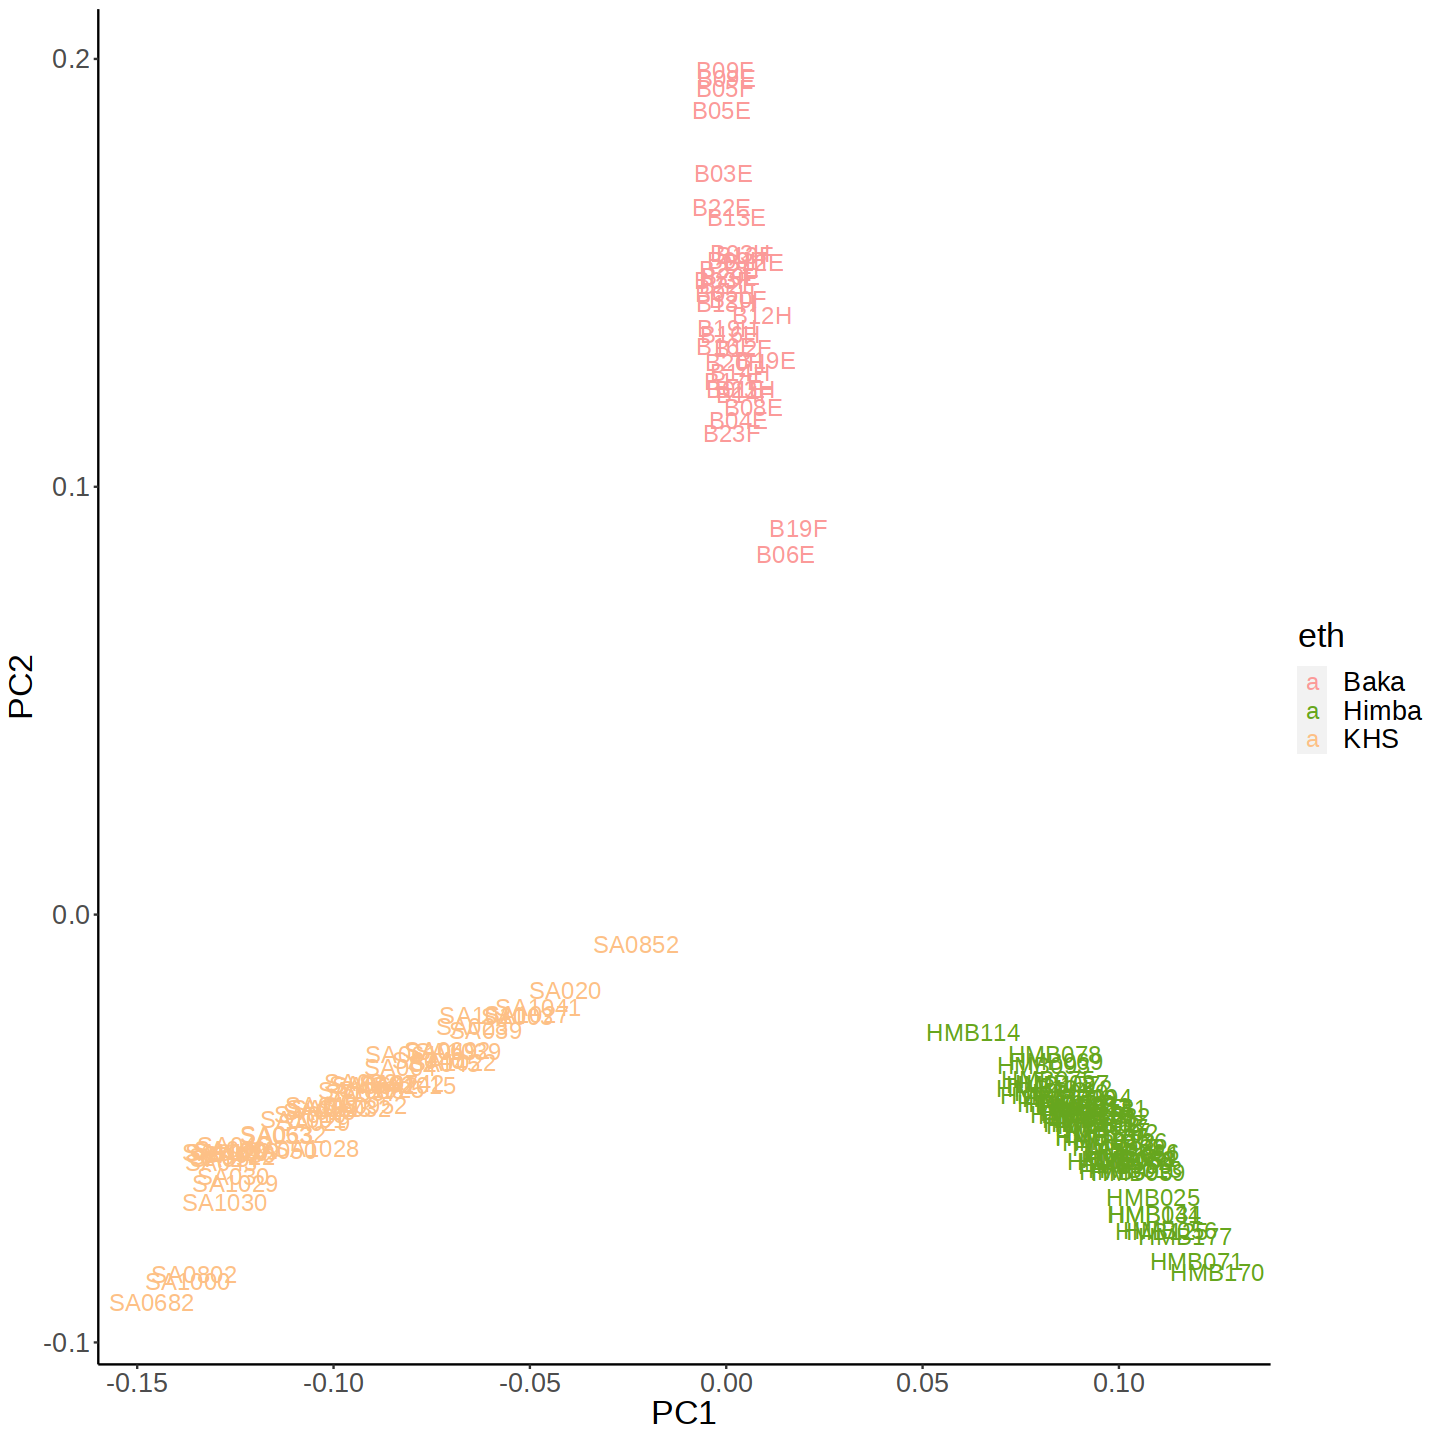

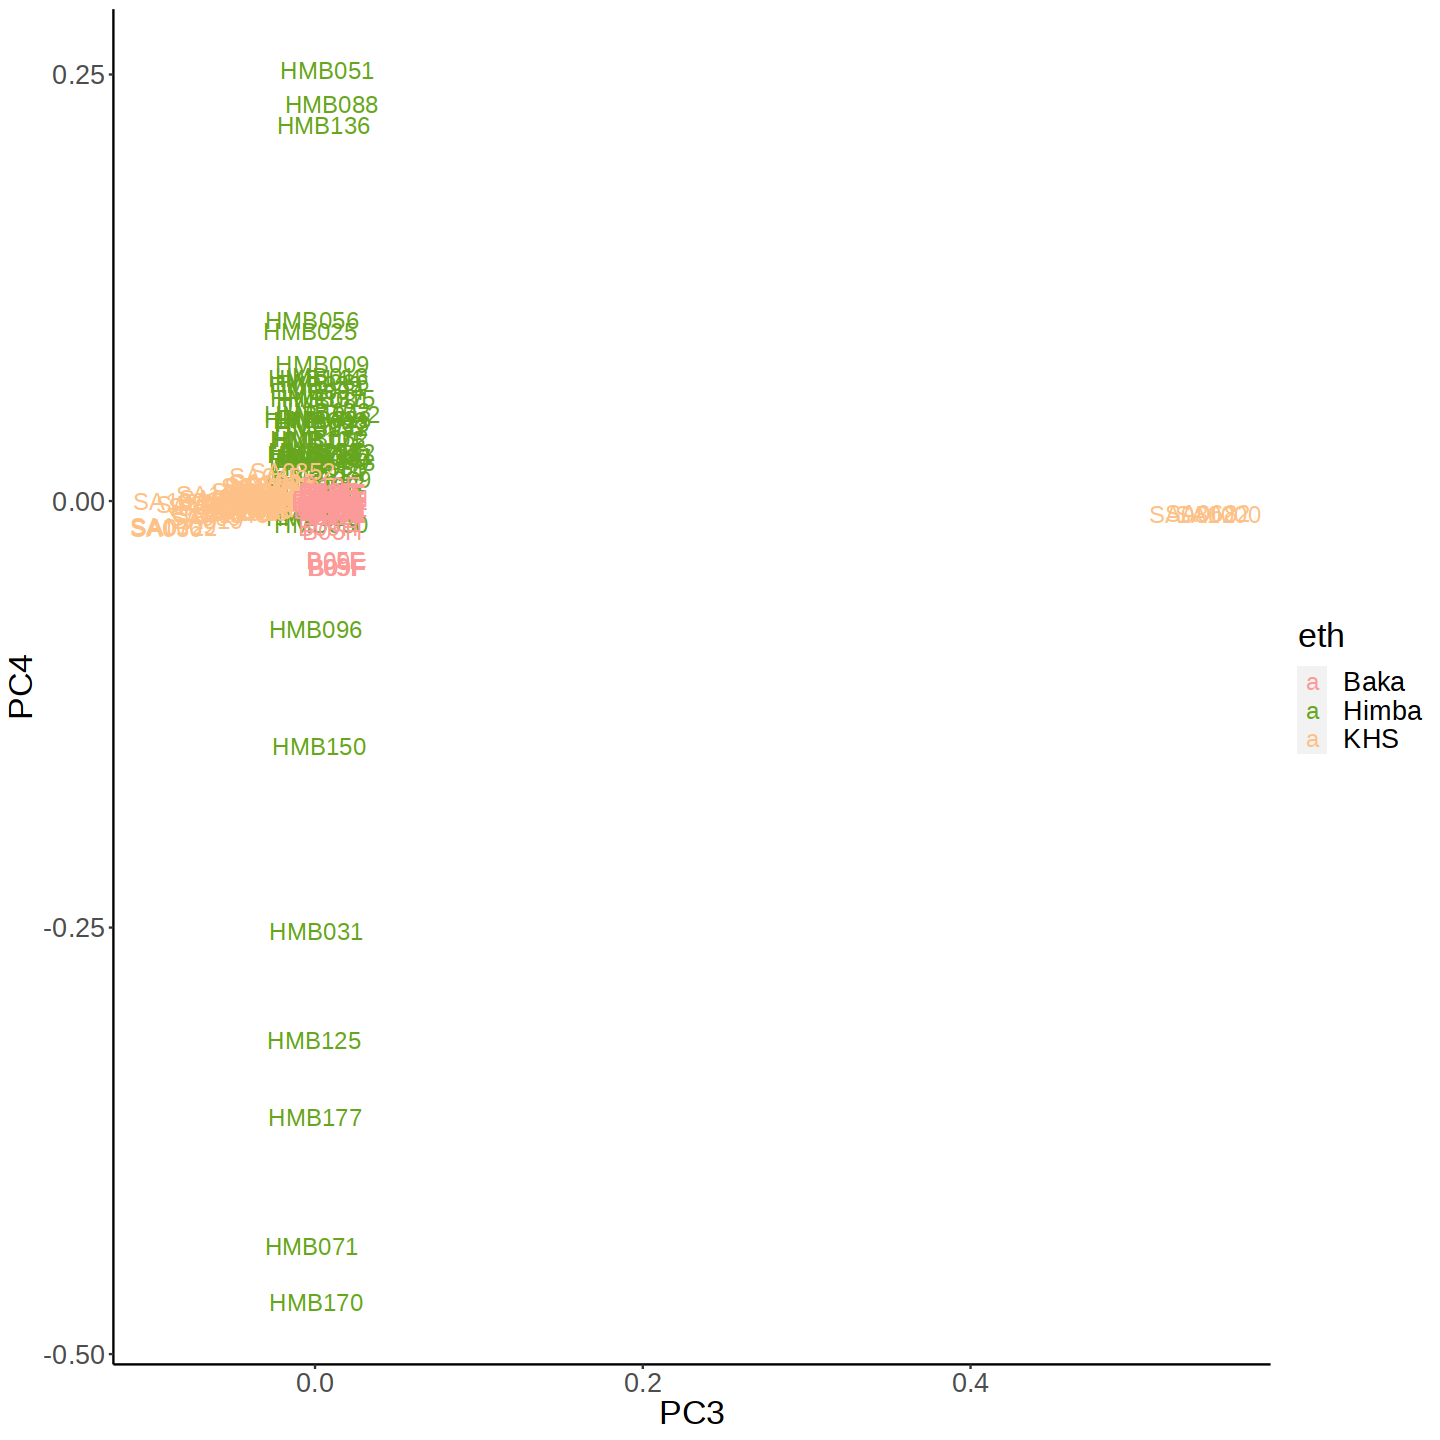

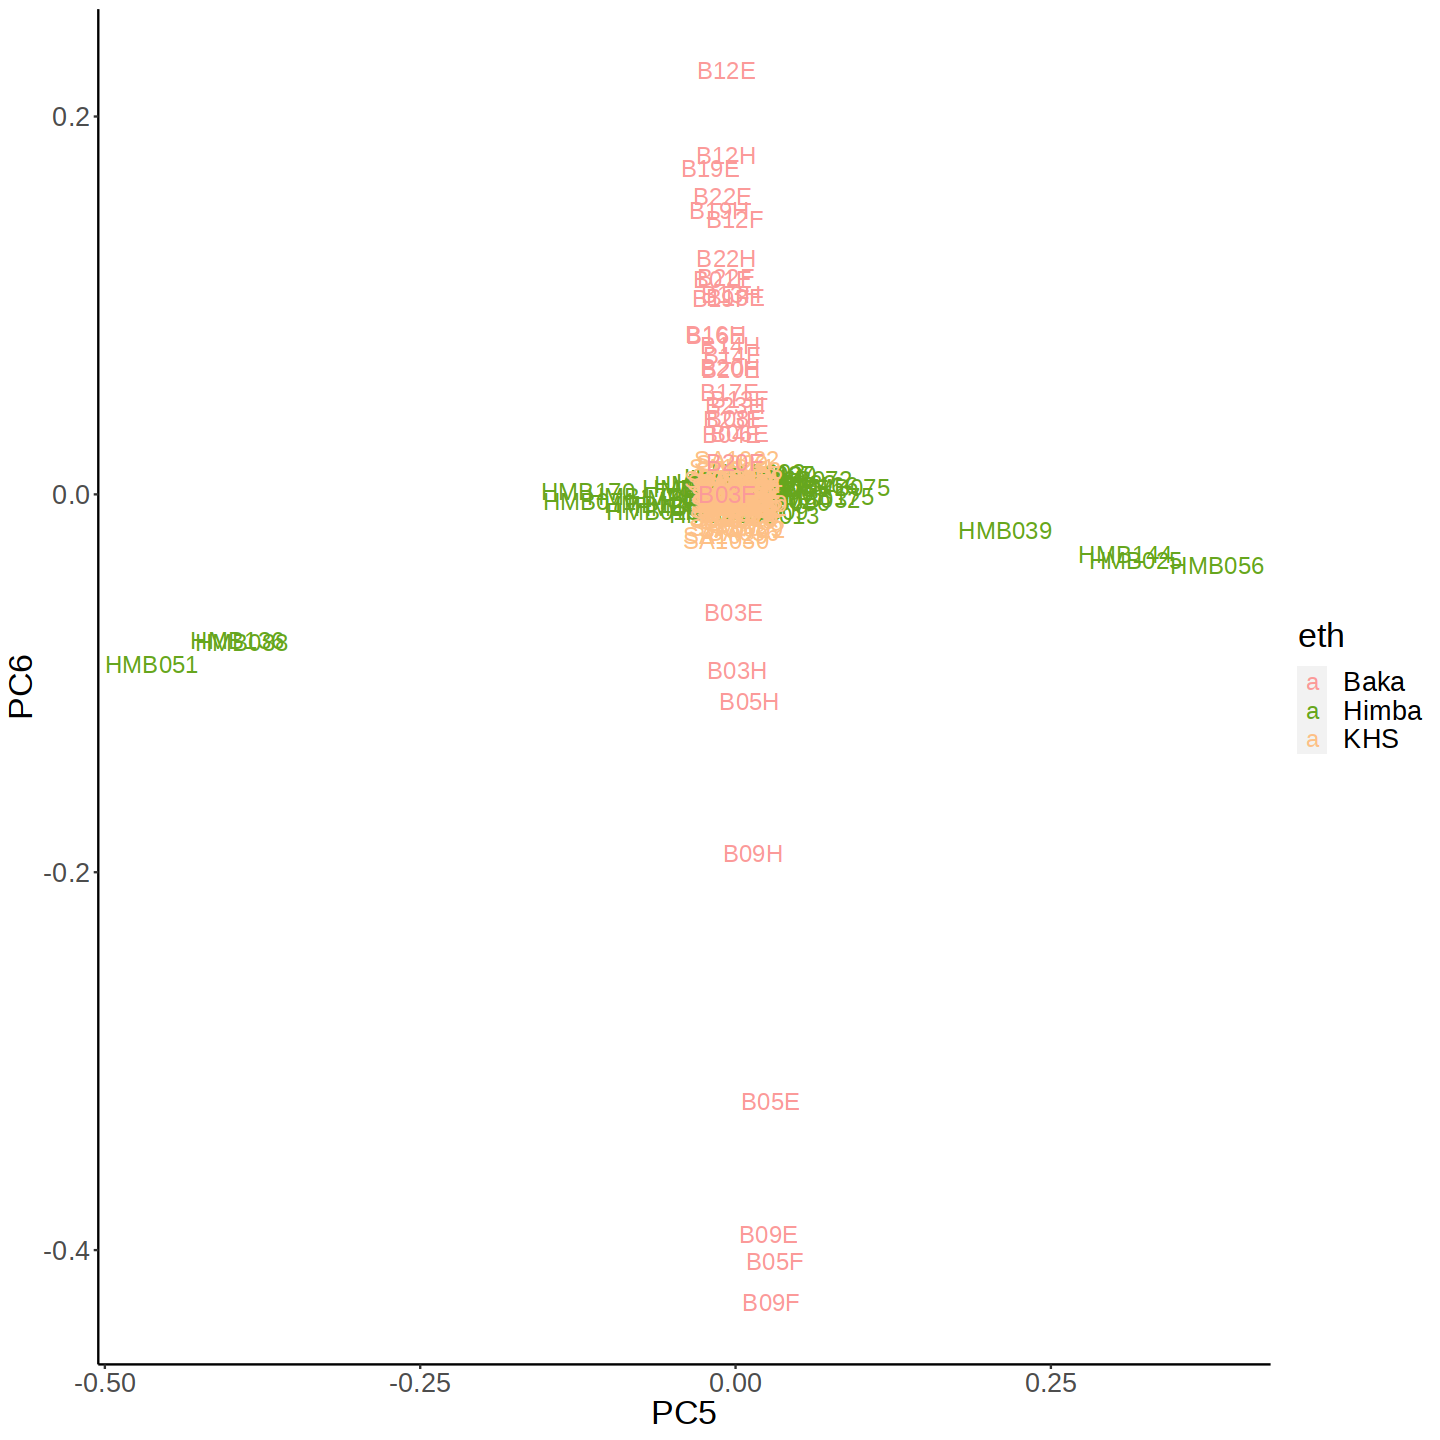

,geno_PC1,geno_PC2,geno_PC3,geno_PC4,geno_PC5,geno_PC6,geno_PC7,geno_PC8,geno_PC9,geno_PC10,...,geno_PC17,geno_PC18,geno_PC19,geno_PC20,age,sex,ID,Neutro,eth_batch,eth
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<fct>,<chr>
SA1000,-0.137230,-0.0857919,0.550994,-0.00760777,0.00700449,-0.00506862,0.00651399,-0.00623288,-0.01080880,0.00171119,...,-0.001583130,-0.00442560,0.00232997,0.00423400,85,1,SA1000,0.2446993,KHS_2,KHS
SA0802,-0.135551,-0.0842353,0.535074,-0.00783801,0.00711052,-0.00681638,0.00587319,-0.00869503,-0.00819068,0.00159885,...,-0.001662480,-0.00266247,0.00260172,0.00400844,76,1,SA0802,0.7261395,KHS_2,KHS
SA0682,-0.146340,-0.0907390,0.544560,-0.00745349,0.00380989,-0.00774170,0.00631262,-0.00189811,-0.00273432,0.00384351,...,0.000178911,-0.00137206,0.00702706,0.00168193,62,1,SA0682,0.9262779,KHS_2,KHS


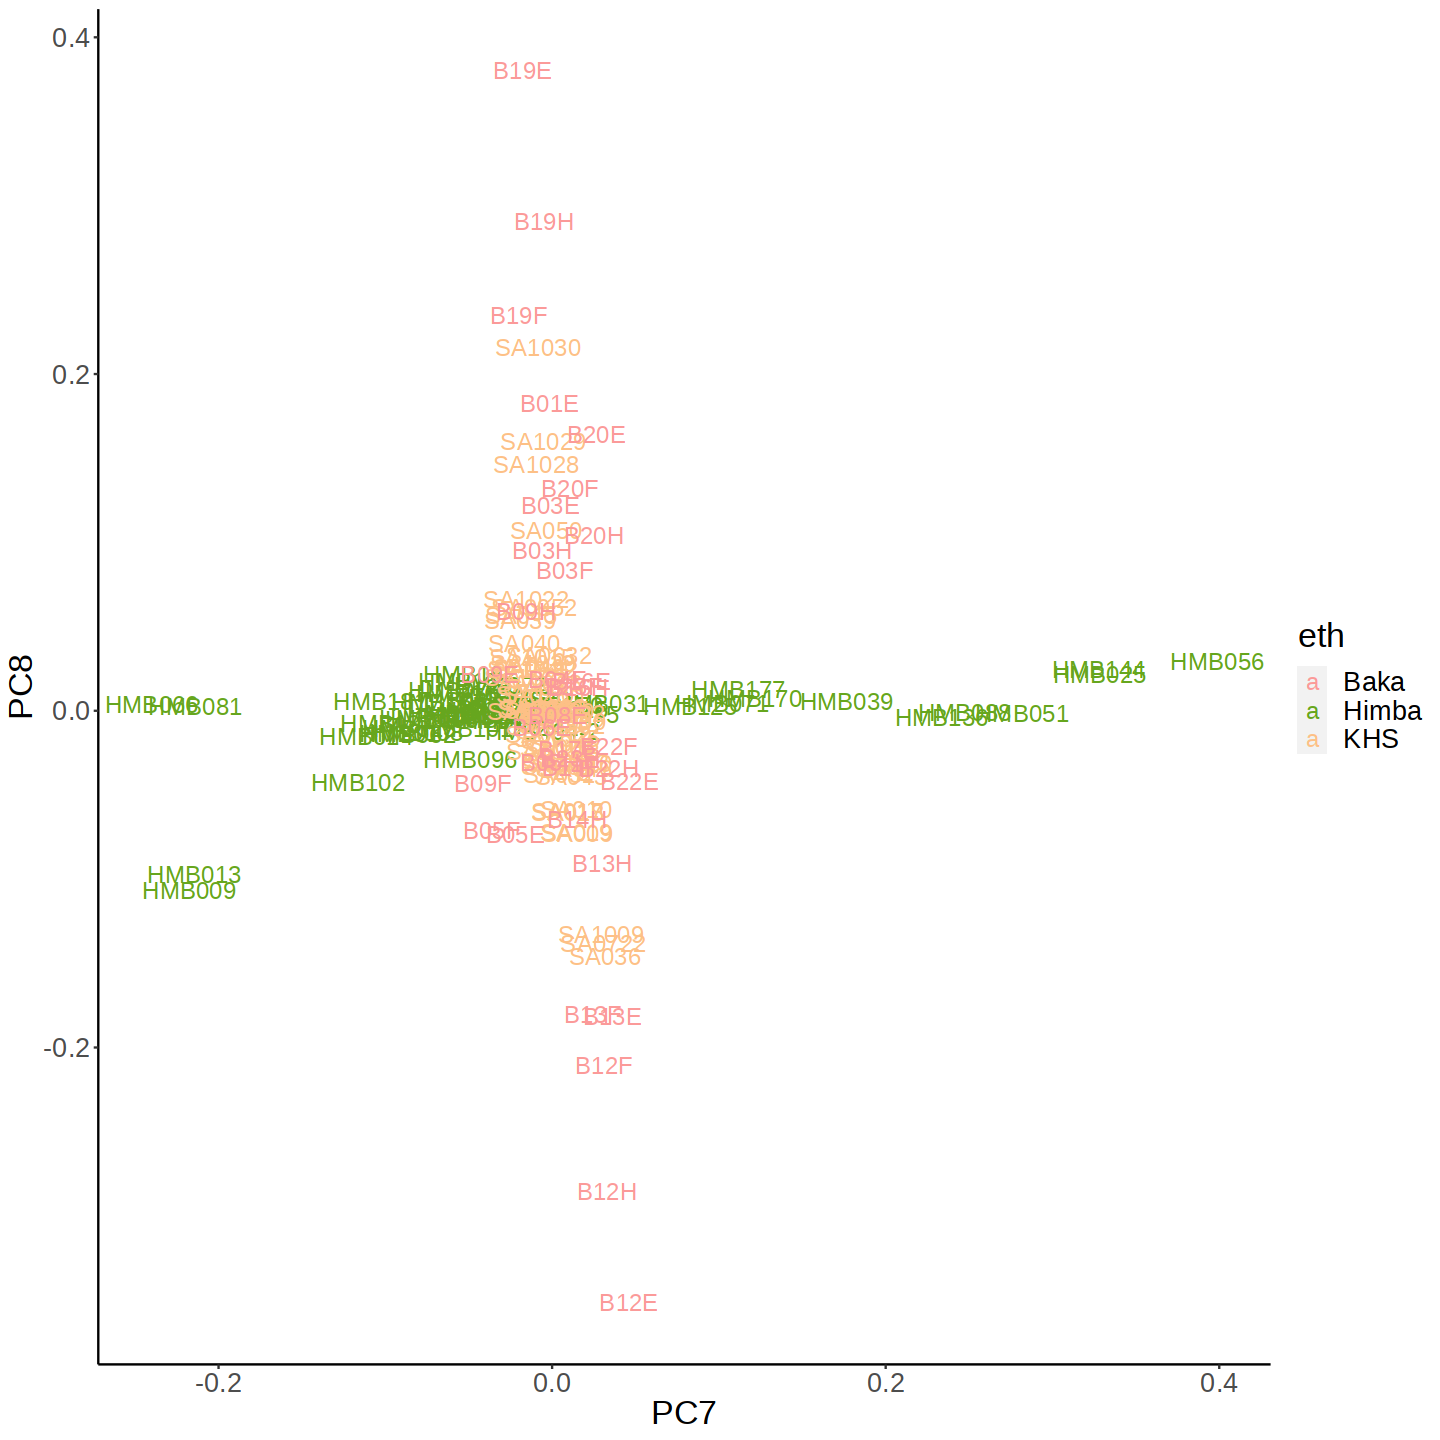

,geno_PC1,geno_PC2,geno_PC3,geno_PC4,geno_PC5,geno_PC6,geno_PC7,geno_PC8,geno_PC9,geno_PC10,...,geno_PC17,geno_PC18,geno_PC19,geno_PC20,age,sex,ID,Neutro,eth_batch,eth
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<fct>,<chr>
SA1000,-0.137230,-0.0857919,0.550994,-0.00760777,0.00700449,-0.00506862,0.00651399,-0.00623288,-0.01080880,0.00171119,...,-0.001583130,-0.00442560,0.00232997,0.00423400,85,1,SA1000,0.2446993,KHS_2,KHS
SA0802,-0.135551,-0.0842353,0.535074,-0.00783801,0.00711052,-0.00681638,0.00587319,-0.00869503,-0.00819068,0.00159885,...,-0.001662480,-0.00266247,0.00260172,0.00400844,76,1,SA0802,0.7261395,KHS_2,KHS
SA0682,-0.146340,-0.0907390,0.544560,-0.00745349,0.00380989,-0.00774170,0.00631262,-0.00189811,-0.00273432,0.00384351,...,0.000178911,-0.00137206,0.00702706,0.00168193,62,1,SA0682,0.9262779,KHS_2,KHS


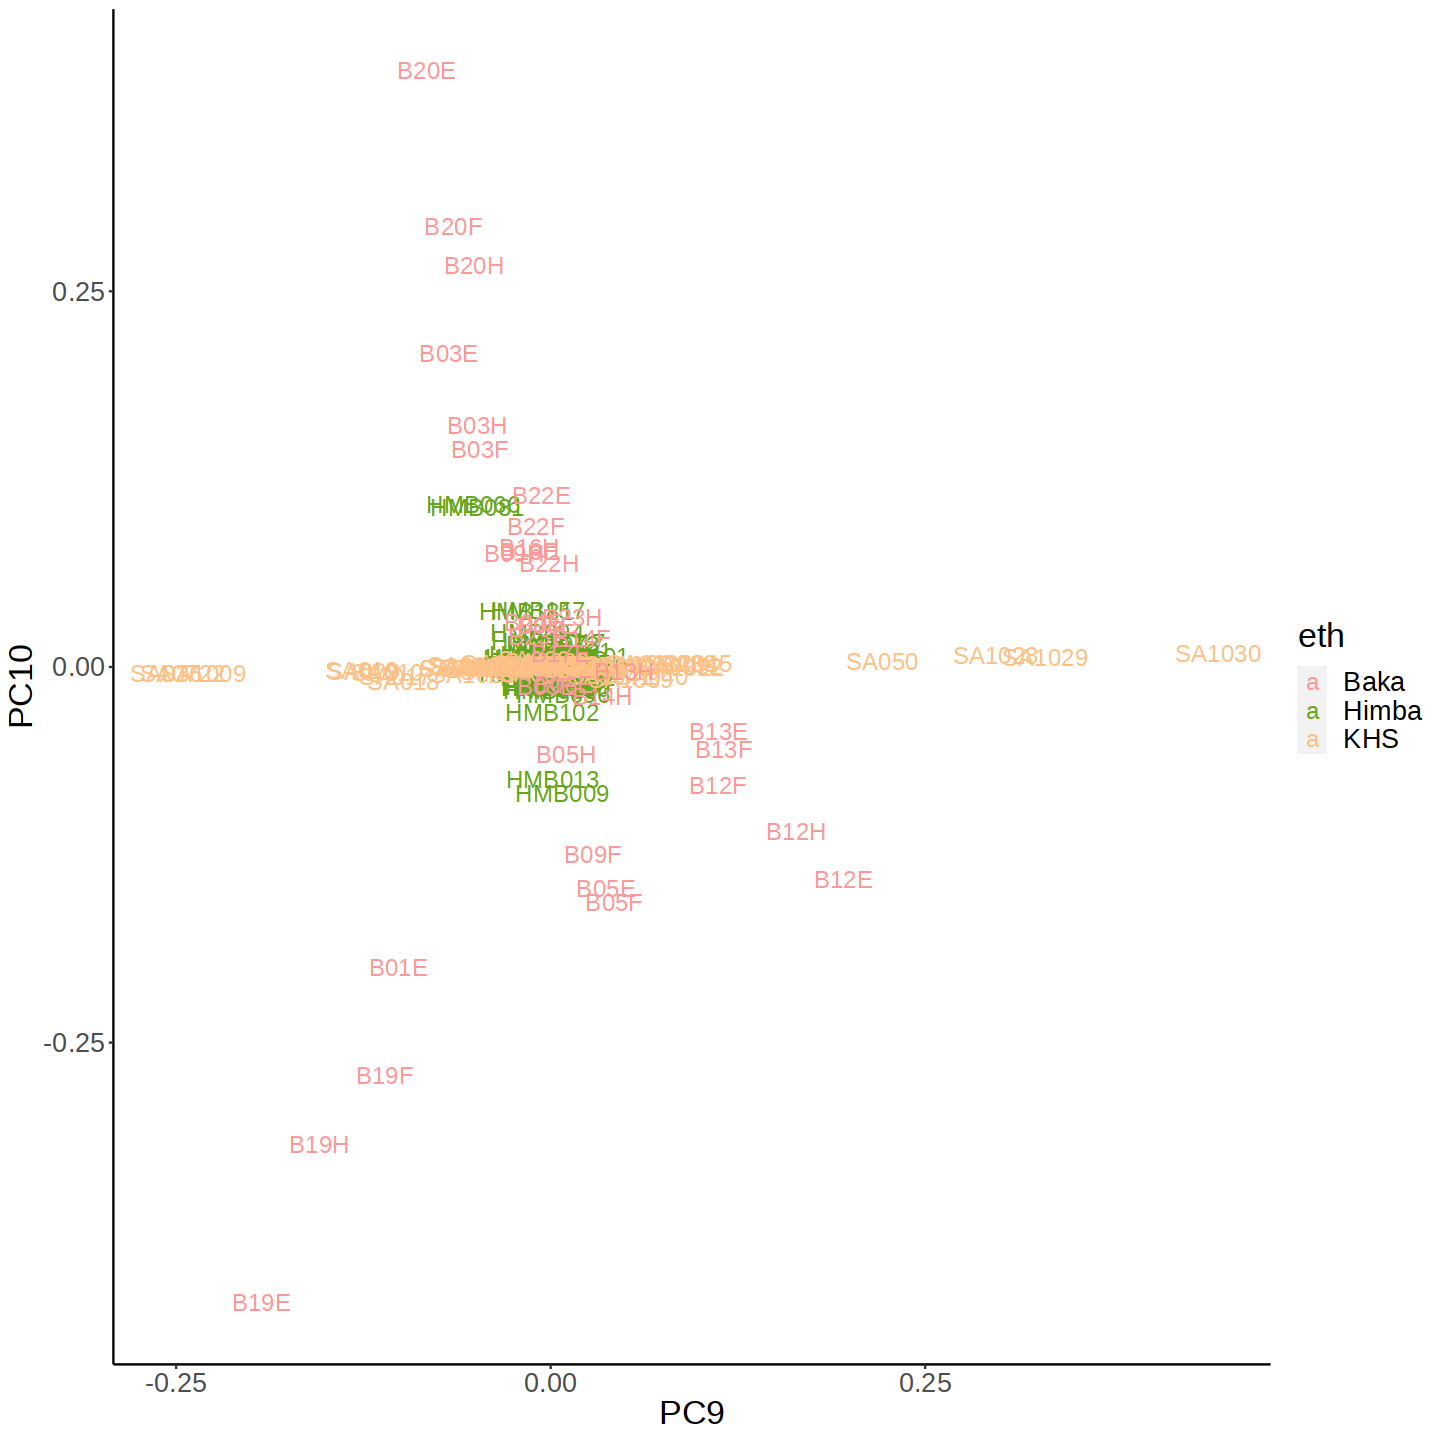

In [5]:
options(repr.plot.width=12, repr.plot.height=12)
library(ggplot2)
library(RColorBrewer)

pheno_merged$eth_batch <- as.factor(pheno_merged$eth_batch)

n <- length(unique(pheno_merged$eth))
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
colors <- sample(col_vector,n)

# Visualize geno PCs
ggplot(pheno_merged, aes(x=geno_PC1, y=geno_PC2, color=eth)) +
  xlab("PC1") + ylab("PC2") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)

ggplot(pheno_merged, aes(x=geno_PC3, y=geno_PC4, color=eth)) +
  xlab("PC3") + ylab("PC4") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)

ggplot(pheno_merged, aes(x=geno_PC5, y=geno_PC6, color=eth)) +
  xlab("PC5") + ylab("PC6") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)

ggplot(pheno_merged, aes(x=geno_PC7, y=geno_PC8, color=eth)) +
  xlab("PC7") + ylab("PC8") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)

pheno_merged[pheno_merged$geno_PC3 > .2, ]

ggplot(pheno_merged, aes(x=geno_PC9, y=geno_PC10, color=eth)) +
  xlab("PC9") + ylab("PC10") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)

pheno_merged[pheno_merged$geno_PC3 > .2, ]

In [6]:

hg19_snp_manifest <- read.csv("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/HM450.hg19.manifest.tsv", header=T, sep="\t")
all_fusion <- as.data.frame(all_merged[rownames(all_merged) %in% hg19_snp_manifest$probeID,])

print(paste0("#cpgs found in manifest:",nrow(all_fusion)))

manifest <- hg19_snp_manifest[hg19_snp_manifest$probeID %in% rownames(all_fusion),]
gene <- rownames(all_fusion)
all_fusion <- cbind(gene, all_fusion)
manifest <- dplyr::arrange(manifest, desc(probeID))
all_fusion <- dplyr::arrange(all_fusion, desc(gene))

end <- manifest[match(all_fusion$gene, manifest$probeID),"CpG_end"]
start <- manifest[match(all_fusion$gene, manifest$probeID), "CpG_beg"]
chr <- manifest[match(all_fusion$gene, manifest$probeID), "CpG_chrm"]
all_fusion <- cbind(chr,start, end, all_fusion)
all_fusion$chr <- gsub("chr*", " ", all_fusion$chr )

names(all_fusion)[names(all_fusion)=="chr"] <- 'chr'

head(all_fusion)
nrow(all_fusion)
write.table(all_fusion, file = "/share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/all/all_hg19_meth_pre.bed", sep = "\t",row.names = FALSE, quote=FALSE)
all_fusion_params2 <- cbind("all", all_fusion$chr, all_fusion$start, all_fusion$end, all_fusion$gene)
nrow(all_fusion_params2)
write.table(all_fusion_params2, file = "all_fusion_params2.tsv", sep = "\t",row.names = FALSE, quote=FALSE, col.names=FALSE)

# add a "#" to the bed file
command <- "sed -i '1s/^/#/' all_hg19_meth_pre.bed && mv all_hg19_meth_pre.bed all_hg19_meth.bed"
# Execute the command in the shell
##system(command, intern = TRUE)

#need to gzip the file before running fusion
command <- "rm /share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/all/all_hg19_meth.bed.gz"
system(command, intern = TRUE)

command <- "gzip /share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/all/all_hg19_meth.bed"
# Execute the command in the shell
system(command, intern = TRUE)




[1] "#cpgs found in manifest:355103"


,chr,start,end,gene,HMB494-2,HMB091,HMB113,HMB114,HMB120,HMB125,...,B23F,B06E,B22E,B13E,B09E,B12E,B05H,B05F,B09H,B09F
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
cg27666123,5,126988028,126988030,cg27666123,0.9511034,0.9542028,0.9574754,0.9576432,0.8999700,0.9520747,...,0.9413960,0.9517397,0.9463923,0.9441233,0.9502968,0.9447021,0.9368144,0.9540994,0.9379185,0.9376760
cg27666046,17,80279076,80279078,cg27666046,0.6787137,0.5308825,0.7276940,0.7674423,0.6400866,0.6029291,...,0.5978235,0.6743975,0.6762457,0.6628783,0.6363521,0.6417768,0.6404845,0.6397238,0.6594307,0.6510625
cg27665985,15,66116726,66116728,cg27665985,0.04350514,0.12477238,0.21701839,0.07713688,0.03849464,0.10880616,...,0.08305077,0.17049306,0.20441415,0.13900787,0.12183235,0.16260530,0.13444092,0.08708611,0.13134521,0.10205942
cg27665925,19,12098905,12098907,cg27665925,0.01491887,0.01797786,0.01793220,0.01934702,0.01451111,0.01735254,...,0.05685797,0.05160272,0.05743849,0.04557883,0.03885046,0.04740686,0.04450050,0.04355517,0.03877915,0.03412790
cg27665860,11,68970672,68970674,cg27665860,0.9378335,0.9221857,0.9524712,0.9369737,0.9223155,0.9137598,...,0.8938910,0.8874205,0.8956014,0.9075677,0.8946690,0.8848898,0.9291066,0.8929173,0.8790387,0.9018511
cg27665829,4,20698771,20698773,cg27665829,0.8587899,0.9064570,0.8916147,0.9311546,0.8668224,0.9255111,...,0.9162472,0.9391090,0.9297687,0.9257319,0.9017404,0.9071211,0.9290037,0.9293228,0.9196179,0.9137234


[1] 355103

[1] 355103

character(0)

Warning message in system(command, intern = TRUE):
"running command 'gzip /share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/FUSION_pheno/all/all_hg19_meth.bed' had status 1"


character(0)
attr(,"status")
[1] 1
attr(,"errmsg")
[1] "Resource temporarily unavailable"

In [7]:

#head(cols_cpgs)
#ncol(cols_cpgs)
#cols_cpgs <- cols_cpgs[, apply(cols_cpgs, 2, function(x) all(!is.na(x)))]
#ncol(cols_cpgs)
#for_pc <- cols_cpgs[,grepl("cg", colnames(cols_cpgs))]
#all_meth_pca <- prcomp(for_pc, center=TRUE, scale=TRUE)
#merge in meth PCs to pheno_merged

ncol(for_pc)

ERROR: Error in ncol(for_pc): object 'for_pc' not found


In [ ]:
meth_pc <- all_meth_pca$x
head(pheno_merged)

meth_pc <- meth_pc[rownames(pheno_merged),]

new_column_names <- paste0("meth_", colnames(meth_pc))
new_column_names
# Assign the new column names to the dataframe
colnames(meth_pc) <- new_column_names

pheno_merged <- cbind(pheno_merged, meth_pc)
save(pheno_merged, file="all_pheno_merged.RData")

In [ ]:

options(repr.plot.width=12, repr.plot.height=12)
library(ggplot2)
library(RColorBrewer)



pheno_merged$eth_batch <- as.factor(pheno_merged$eth_batch)
n <- length(unique(pheno_merged$eth_batch))
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
colors <- sample(col_vector,n)
ggplot(pheno_merged, aes(x=meth_PC1, y=meth_PC2, color=eth_batch)) +
  xlab("PC1") + ylab("PC2") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)

ggplot(pheno_merged, aes(x=meth_PC3, y=meth_PC4, color=eth_batch)) +
  xlab("PC3") + ylab("PC4") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)

ggplot(pheno_merged, aes(x=meth_PC5, y=meth_PC6, color=eth_batch)) +
  xlab("PC5") + ylab("PC6") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)

ggplot(pheno_merged, aes(x=meth_PC7, y=meth_PC8, color=eth_batch)) +
  xlab("PC7") + ylab("PC8") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)



ggplot(pheno_merged, aes(x=meth_PC9, y=meth_PC10, color=eth_batch)) +
  xlab("PC9") + ylab("PC10") + 
  scale_color_manual(values = colors) +
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"),
        text = element_text(size = 20)) + 
  geom_text(aes(label=rownames(pheno_merged)), size=5)



In [ ]:
colnames(pheno_merged)
to_select <- c("ID","sex","geno_PC1", "geno_PC2", "geno_PC3", "geno_PC4", "geno_PC5", "geno_PC6", "geno_PC7", 
               "geno_PC8", "geno_PC9", "geno_PC10", "meth_PC1", "meth_PC2", "meth_PC3", "meth_PC4",
               "meth_PC5", "Neutro",  "age"
              )

In [ ]:

###get covariates correct for fusion for all
covs_all_10genoPCs_5meth_PCs_Neutro_sex_age <- pheno_merged[,to_select]

covs_all_10genoPCs_5meth_PCs_Neutro_sex_age <- cbind(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age$ID, covs_all_10genoPCs_5meth_PCs_Neutro_sex_age)

covs_all_10genoPCs_5meth_PCs_Neutro_sex_age[, 4:ncol(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age)] <- lapply(4:ncol(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age), function(x) 
    as.numeric(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age[[x]]))

to_scale <- scale(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age[,4:ncol(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age)])
                                                                       
covs_all_10genoPCs_5meth_PCs_Neutro_sex_age <- cbind(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age[,c(1:3)], to_scale)

names(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age)[1] <- "fID"
names(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age)[2] <- "ID"
head(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age)
write.table(covs_all_10genoPCs_5meth_PCs_Neutro_sex_age, file = "/share/hennlab/users/glmeeks/age_methylation/FUSION/FUSION_data/covar/all_covars.tsv", sep = "\t",row.names = FALSE, quote=FALSE, col.names=TRUE)